In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data.csv")
data.head()

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2022-01-01,01,Inbound,54137355.0,110,hhgat,1,Startpoint,Schedule,1900-01-01 06:05:00.000,1900-01-01 06:24:56.000,NaN,NaN
1,2022-01-01,01,Inbound,54137355.0,67,maput,2,Midpoint,Schedule,1900-01-01 06:09:00.000,1900-01-01 06:27:46.000,NaN,NaN
2,2022-01-01,01,Inbound,54137355.0,72,cntsq,3,Midpoint,Schedule,1900-01-01 06:12:00.000,1900-01-01 06:32:16.000,NaN,NaN
3,2022-01-01,01,Inbound,54137355.0,75,mit,4,Midpoint,Schedule,1900-01-01 06:15:00.000,1900-01-01 06:35:03.000,NaN,NaN
4,2022-01-01,01,Inbound,54137355.0,79,hynes,5,Midpoint,Schedule,1900-01-01 06:19:00.000,1900-01-01 06:38:10.000,NaN,NaN


In [4]:
print(data.shape)
print(data.columns)

(2348823, 13)
Index(['service_date', 'route_id', 'direction_id', 'half_trip_id', 'stop_id',
       'time_point_id', 'time_point_order', 'point_type', 'standard_type',
       'scheduled', 'actual', 'scheduled_headway', 'headway'],
      dtype='object')


In [5]:
data.isnull().sum()

service_date               0
route_id                   0
direction_id               0
half_trip_id             213
stop_id                    0
time_point_id              0
time_point_order           0
point_type                 0
standard_type              0
scheduled                  0
actual                180264
scheduled_headway    1196318
headway              1418416
dtype: int64

Top 10 Most Frequent and Least Frequent Route IDs and 

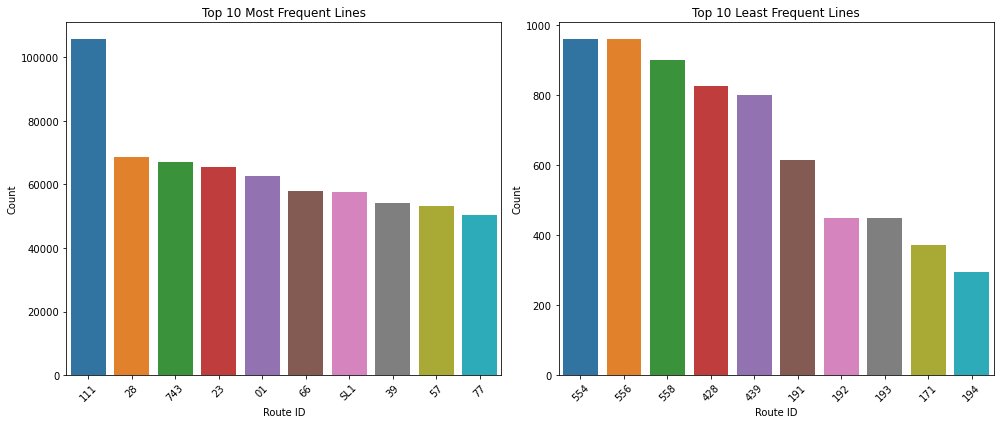

In [7]:
route_counts = data['route_id'].value_counts()

# Select the top 10 most frequent and least frequent lines
top_10_most_frequent = route_counts.head(10)
top_10_least_frequent = route_counts.tail(10)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 most frequent lines
sns.barplot(x=top_10_most_frequent.index, y=top_10_most_frequent.values, ax=axes[0])
axes[0].set_title('Top 10 Most Frequent Lines')
axes[0].set_xlabel('Route ID')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 least frequent lines
sns.barplot(x=top_10_least_frequent.index, y=top_10_least_frequent.values, ax=axes[1])
axes[1].set_title('Top 10 Least Frequent Lines')
axes[1].set_xlabel('Route ID')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Top 20 route with maximum average headway

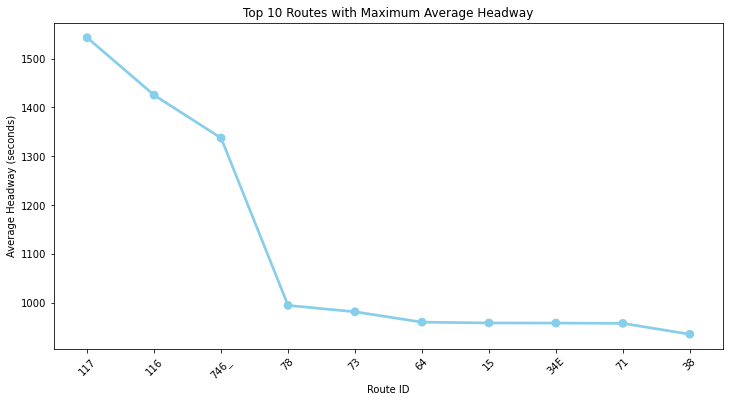

In [3]:
# Calculate the average headway for each route
average_headway_by_route = data.groupby('route_id')['headway'].mean().reset_index()

# Sort the routes based on average headway in descending order (maximum headway first)
sorted_routes_descending = average_headway_by_route.sort_values(by='headway', ascending=False)

# Select the top 20 routes with maximum average headway
top_20_max_headway = sorted_routes_descending.head(10)

# Create a point plot to visualize the top 20 routes with maximum average headway
plt.figure(figsize=(12, 6))
sns.pointplot(x='route_id', y='headway', data=top_20_max_headway, color='skyblue')
plt.title('Top 10 Routes with Maximum Average Headway')
plt.xlabel('Route ID')
plt.ylabel('Average Headway (seconds)')
plt.xticks(rotation=45)
plt.show()


How the number of trains that ran every day changed in the month of January

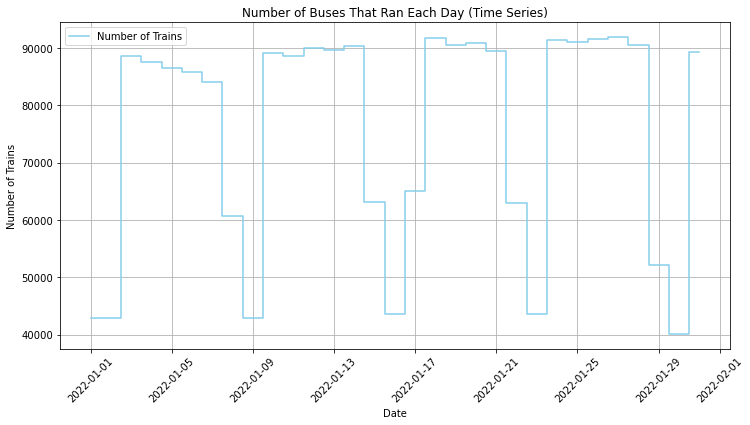

In [4]:
data['service_date'] = pd.to_datetime(data['service_date'])
trains_per_date = data.groupby('service_date').size().reset_index(name='train_count')
plt.figure(figsize=(12, 6))
plt.step(trains_per_date['service_date'], trains_per_date['train_count'], where='mid', color='skyblue', label='Number of Trains')
plt.title('Number of Buses That Ran Each Day (Time Series)')
plt.xlabel('Date')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Point type distribution - Start, Mid, End

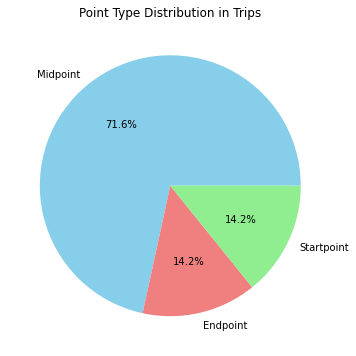

In [10]:
# Count the number of trips for each point type
point_type_counts = data['point_type'].value_counts()

# Create a pie chart to visualize the point type distribution
plt.figure(figsize=(6, 6))
plt.pie(point_type_counts, labels=point_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Point Type Distribution in Trips')
plt.show()

Hour Wise Analysis of Actual Departure Time

In [88]:
data1=data
data1["actual"]=pd.to_datetime(data1['actual']).dt.time

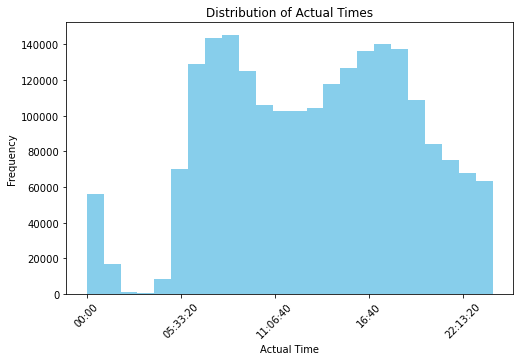

In [90]:
plt.figure(figsize=(8, 5))
plt.hist(data1['actual'], bins=24, color='skyblue')
plt.title('Distribution of Actual Times')
plt.xlabel('Actual Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()